# Machine Learning Project 

### Matej SMID, Adelina CUCU, Sofia FEDOTOVA, Bhavini KHASANA

## Intoduction

The  dataset  Train.csv  comes  from  Kaggle.

 We chose the first task: 
### 1.   Detect   if   there   is   an   attack   on   the   network   or   not.

Firstly we need to import all libraties we are using:

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
#import seaborn as sb
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import time
from sklearn.pipeline import Pipeline

<h1> Load the training data </h1>

In [42]:
#from google.colab import drive
#drive.mount('/content/drive')


In [43]:
df = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


## Exploratory analysis

In [44]:
# Descriptive statistics
df.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


We are now storing the labels of our columns in the variable "column_names"

In [45]:
column_name=df.columns
print (column_name)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')


## Checking the data consistency

### We check the number of duplicates using the pandas <em>duplicated()</em> method. 
The assertion checks if the number of non-duplicates (unique) rows is equal to the total number of rows in the dataset

In [46]:
number_of_duplicates = df.duplicated().value_counts()

print(number_of_duplicates)
print(df.shape)
print(number_of_duplicates[0] == df.shape[0])
assert number_of_duplicates[0] == df.shape[0], 'There are duplicates in the train dataset'

number_of_duplicates = df_test.duplicated().value_counts()
assert number_of_duplicates[0] == df_test.shape[0], 'There are duplicates in the test dataset'


False    125973
dtype: int64
(125973, 43)
True


We check if the names of the collumns are all unique

In [47]:

unique, counts = np.unique(df.columns.duplicated(), return_counts=True)
print(unique, counts)
print(df.shape)
assert counts[0] == df.shape[1], 'There are duplicate columns in the train dataset'

unique, counts = np.unique(df_test.columns.duplicated(), return_counts=True)
assert counts[0] == df_test.shape[1], 'There are duplicate columns in the test dataset'

[False] [43]
(125973, 43)


In case of detected duplicates in our dataset, we delete them and return the dataset with the duplicates row removed

In [48]:
# drop_duplicates () : this function return DataFrame with duplicate rows removed.
df = df.drop_duplicates(subset = column_name[:-1] , keep ='first' , inplace = False)
df.shape

(125973, 43)

We are checking for null values in the dataset.

In [49]:
null_rows = df[df.isnull().any(1)]
print(null_rows)

null_rows = df_test[df_test.isnull().any(1)]
print(null_rows)

Empty DataFrame
Columns: [duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, attack, last_flag]
Index: []

[0 rows x 43 columns]
Empty DataFrame
Columns: [duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, i

We have no null values

## One-Hot-Encoding

We extract the categorical column names from the dataframe. Next we will replace their string values by their one-hot encoding 

In [50]:
categorical_columns = [df.columns[i] for i in range(len(df.columns)) if type(df[df.columns[i]][0]) == str]

# Remove categorical columns from the rest 
continuous_columns = df.columns.tolist()
for category in categorical_columns:
    continuous_columns.remove(category)


categorical_columns.remove('attack')
print(categorical_columns)
print(continuous_columns)



['protocol_type', 'service', 'flag']
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag']


## Deleting  uninformative  variables using correlation matrix

Next we look at the correlation between continuous columns. We do this to explore the statistical feature space of our data. Our aim, is to remove redundant features ,i.e., those that have a strong correlation with other features.

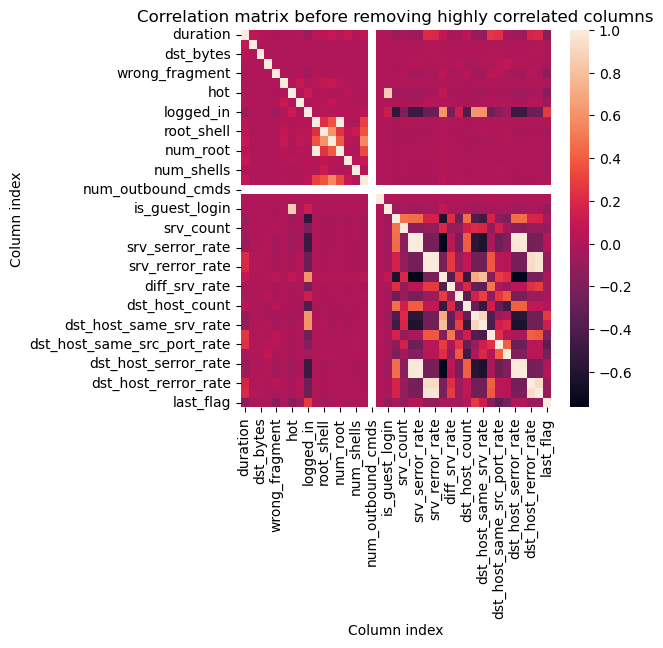

In [51]:
continuous_columns_corr = df[continuous_columns].corr()
plt.figure(figsize=(5,5), dpi=100)
sns.heatmap(continuous_columns_corr)
plt.title("Correlation matrix before removing highly correlated columns")
plt.xlabel("Column index")
plt.ylabel("Column index")
plt.show()

In [52]:
continuous_columns_corr.to_numpy()

array([[ 1.00000000e+00,  7.07368282e-02,  3.48777983e-02, ...,
         1.73815290e-01,  1.99023604e-01, -1.56310613e-01],
       [ 7.07368282e-02,  1.00000000e+00,  2.03882858e-04, ...,
        -1.46826964e-03,  1.24492896e-02, -2.25921940e-02],
       [ 3.48777983e-02,  2.03882858e-04,  1.00000000e+00, ...,
         1.17292724e-02,  1.12233308e-02, -1.80756269e-02],
       ...,
       [ 1.73815290e-01, -1.46826964e-03,  1.17292724e-02, ...,
         1.00000000e+00,  9.24687892e-01, -1.00885445e-01],
       [ 1.99023604e-01,  1.24492896e-02,  1.12233308e-02, ...,
         9.24687892e-01,  1.00000000e+00, -9.16624916e-02],
       [-1.56310613e-01, -2.25921940e-02, -1.80756269e-02, ...,
        -1.00885445e-01, -9.16624916e-02,  1.00000000e+00]])

In this part we are deleting high-correlated features in order to encrease the speed.
We can change the variable correlation_threshold to decide how much cross-correlation we are willing to tolerate. 
Higher threshold leads to being more tolerant, meaning we will keep a larger number of columns. Lowering the threshold means we will remove more columns, thus simplyfing the data, reducing the computational load, and easing the interpretation of the results.

In [53]:
import copy



def remove_one(corr_matrix, correlation_threshold):
  for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[1]):
    
      if np.abs(corr_matrix[i,j]) > correlation_threshold:
        return(j)
  return(None)
          #indexes_to_remove.append(j)
          #correlation_columns.remove(df.columns[j])

correlation_threshold = 0.9

correlation_columns = copy.deepcopy(continuous_columns)
for n in range(len(continuous_columns)):
  continuous_columns_corr = df[correlation_columns].corr().to_numpy()
  index_to_remove = remove_one(continuous_columns_corr, correlation_threshold)
  if index_to_remove is None:
    print("Done removing")
    break
  else:
    print(f"Removing {correlation_columns[index_to_remove]}")
    print(correlation_columns)
    correlation_columns.remove(correlation_columns[index_to_remove])

print(continuous_columns)
print(correlation_columns)


Removing num_root
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag']
Removing srv_serror_rate
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_

Now we are checking a new correlation matrix

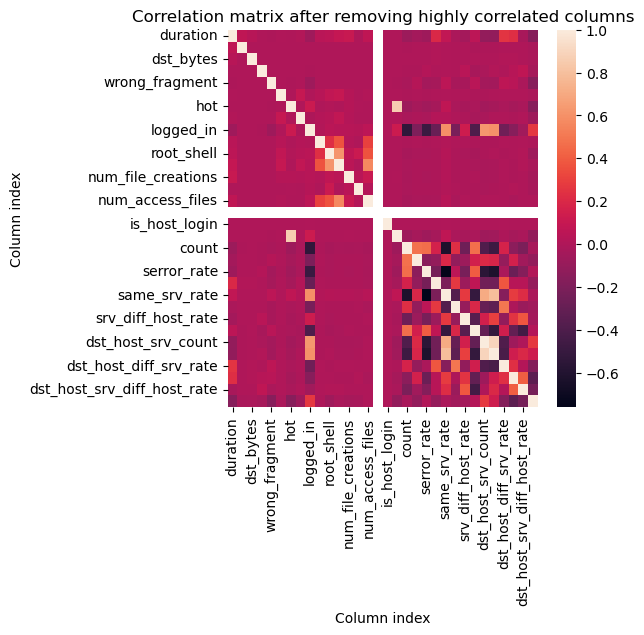

In [54]:
continuous_columns_corr = df[correlation_columns].corr()
plt.figure(figsize=(5,5), dpi=100)
sns.heatmap(continuous_columns_corr)
plt.title("Correlation matrix after removing highly correlated columns")
plt.xlabel("Column index")
plt.ylabel("Column index")
plt.show()

# After choosing the correlation columns, use them in the preprocessing dataframes
continuous_columns = correlation_columns


By analyzing the 4 types of attacks categories, we can conclude that the most relevant information in our dataset for defining if there was an attack or not is: 
“source bytes”
“percentage of packets with errors”
“duration of connection”
“number of file creations”
“number of shell prompts invoked”
“Duration of connection” -Duration
“service requested” 
“number of failed login Attempts”

These are corresponding to the following columns:
src_bytes,
serror_rate,
srv_serror_rate,
num_file_creations,
num_shells,
duration,
service,
num_failed_logins, 
logged_in,


In [55]:
important_columns = ['src_bytes', 'serror_rate', 'srv_serror_rate', 'num_file_creations', 'num_shells', 'duration', 'num_failed_logins', 'logged_in'] 

# We might have removed some of the important columns using our correlation method. To repair this, we add them back if they were removed
for column in important_columns:
  if column not in continuous_columns:
    continuous_columns.append(column)

print(continuous_columns)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'last_flag', 'srv_serror_rate']


In [56]:
df_test[categorical_columns].head()

,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO


In [57]:
df[categorical_columns].head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


Then we encode the categorical columns using one-hot encoding. This encoding transforms the number of our categorical columns from 4 to 107. This relation is the sum of all of the possible categories over all categorical columns.

In [58]:
ohe = OneHotEncoder(handle_unknown='error')

features_encoded = ohe.fit_transform(df[categorical_columns]).toarray()
features_encoded_test = ohe.transform(df_test[categorical_columns]).toarray()

# Add an unique suffix to the ohe labels in case they conflict with df feature labels
features_labels = np.concatenate(np.array(ohe.categories_, dtype=object))
features_labels = [label + '_ohe' for label in features_labels]


df_encoded = pd.DataFrame(features_encoded, columns=features_labels)
df_encoded_test = pd.DataFrame(features_encoded_test, columns=features_labels)
df_encoded.head()

,icmp_ohe,tcp_ohe,udp_ohe,IRC_ohe,X11_ohe,Z39_50_ohe,aol_ohe,auth_ohe,bgp_ohe,courier_ohe,...,REJ_ohe,RSTO_ohe,RSTOS0_ohe,RSTR_ohe,S0_ohe,S1_ohe,S2_ohe,S3_ohe,SF_ohe,SH_ohe
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
df[continuous_columns].head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,last_flag,srv_serror_rate
0,0,491,0,0,0,0,0,0,0,0,...,0.00,0.00,150,25,0.17,0.03,0.17,0.00,20,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.15,0.00,255,1,0.00,0.60,0.88,0.00,15,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.07,0.00,255,26,0.10,0.05,0.00,0.00,19,1.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.00,0.00,30,255,1.00,0.00,0.03,0.04,21,0.2
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.09,255,255,1.00,0.00,0.00,0.00,21,0.0


# Standardizing

Every columns that is not categorical we assume to be a continuous variable that we scale to N(0,1) using sklearn <em>StandardScaler</em>

In [60]:
scaler = StandardScaler()
scaled_columns  = scaler.fit_transform(df[continuous_columns])
scaled_columns_test  = scaler.transform(df_test[continuous_columns])

df_scaled = pd.DataFrame(scaled_columns, columns=continuous_columns)
df_scaled_test = pd.DataFrame(scaled_columns_test, columns=continuous_columns)
df_scaled.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,last_flag,srv_serror_rate
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,0.216426,-0.631929
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-1.965556,-0.631929
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,-0.219970,1.605104
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,0.652823,-0.184522
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,0.652823,-0.631929


Pipeline object to preprocess data faster

In [61]:
numeric_pipeline = Pipeline(steps=[
    ('scale', scaler)
])

categorical_pipeline = Pipeline(steps=[
    ('one-hot', ohe)
])


from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, continuous_columns),
    ('category', categorical_pipeline, categorical_columns)
])

X = df.drop('attack', axis=1)
X_test = df_test

full_processor.fit(X)
full_processor.transform(X)
full_processor.transform(X_test)

array([[-0.11024922, -0.00776224, -0.00491864, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11024922, -0.00776224, -0.00491864, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10948132, -0.0055506 , -0.00491864, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.11024922, -0.00775475, -0.00489054, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11024922, -0.00776224, -0.00491864, ...,  0.        ,
         0.        ,  1.        ],
       [-0.11024922, -0.00776224, -0.00491864, ...,  0.        ,
         0.        ,  0.        ]])

Then we concatenate the df without categorical columns with the onehot encoded columns.

In [62]:
df_preprocessed = pd.concat([df_encoded, df_scaled, df['attack']], axis=1)
df_preprocessed.head()

,icmp_ohe,tcp_ohe,udp_ohe,IRC_ohe,X11_ohe,Z39_50_ohe,aol_ohe,auth_ohe,bgp_ohe,courier_ohe,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,last_flag,srv_serror_rate,attack
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,0.216426,-0.631929,normal
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-1.965556,-0.631929,normal
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,-0.219970,1.605104,neptune
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,0.652823,-0.184522,normal
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,0.652823,-0.631929,normal


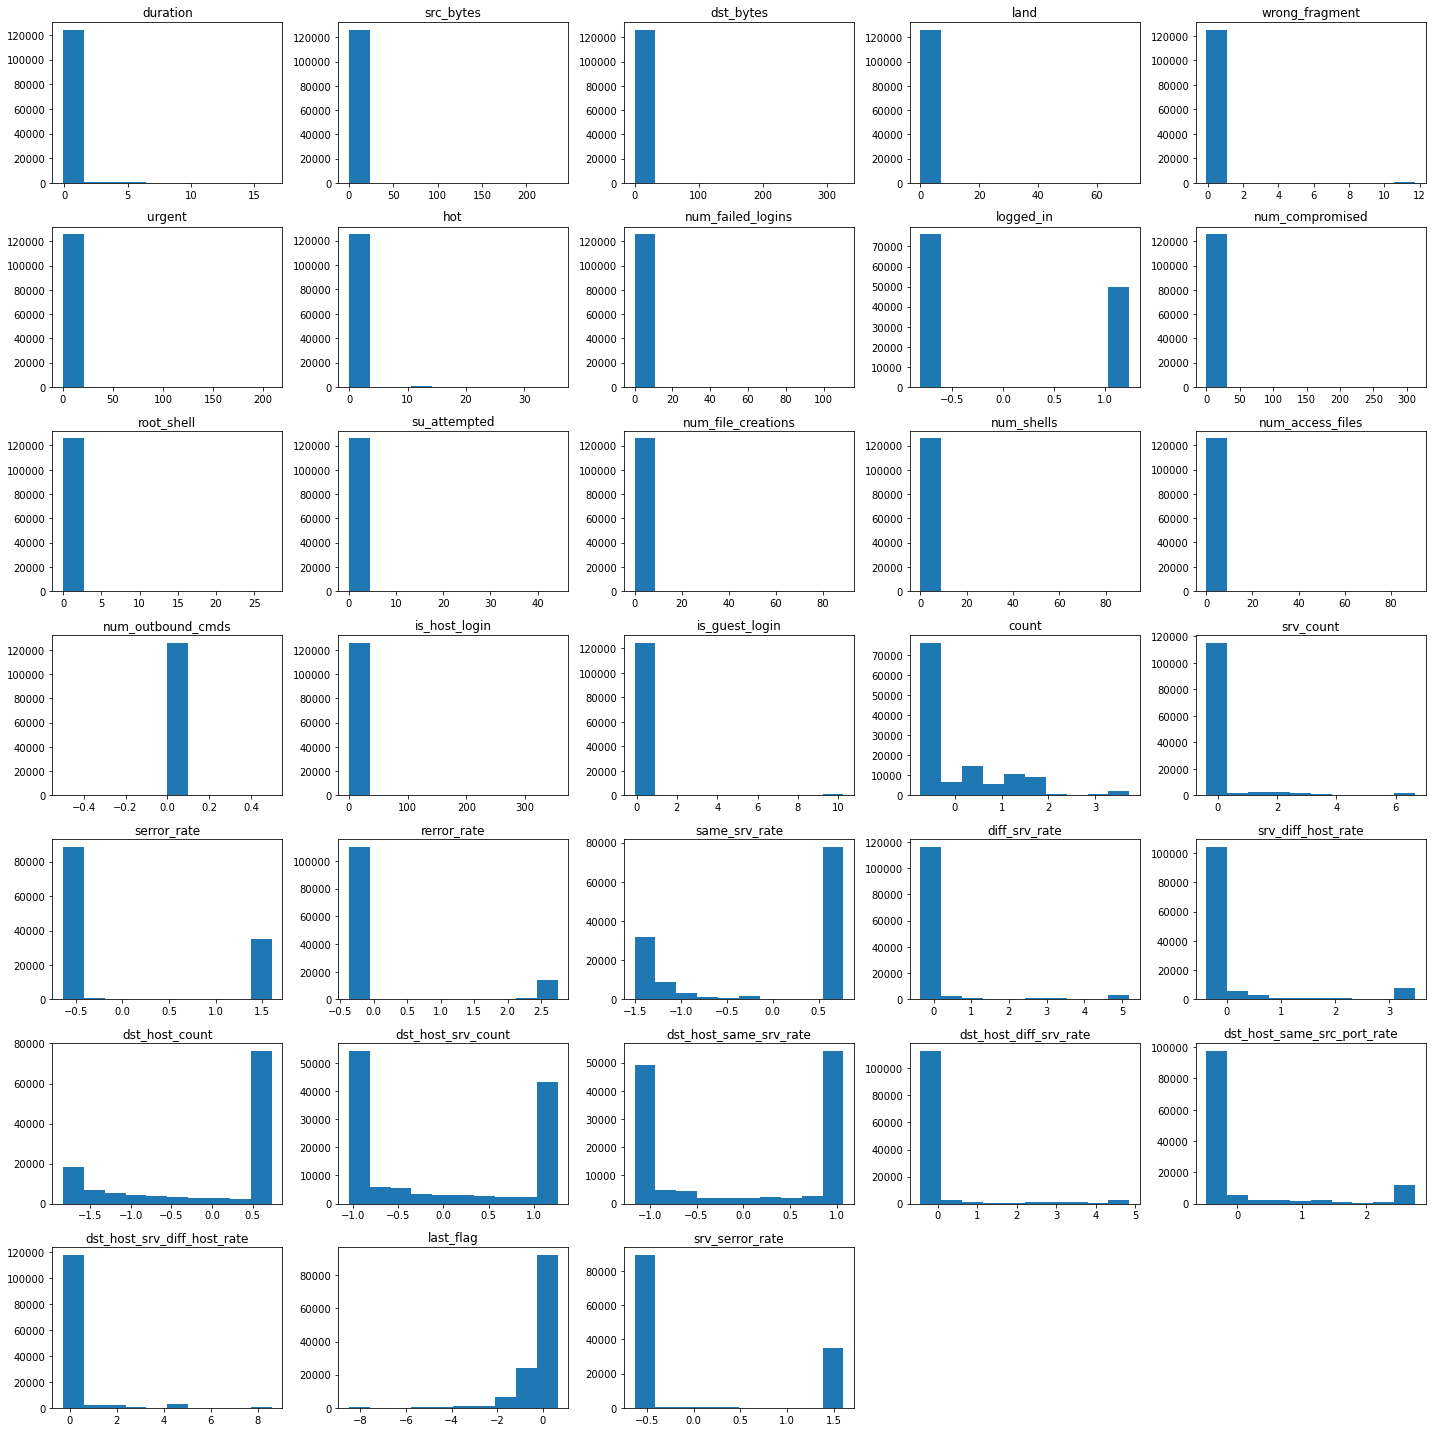

In [63]:
def plot_histogram_matrix(df, columns):
  Tot = len(columns)
  Cols = int(np.sqrt(len(columns)))

  # Compute Rows required
  Rows = Tot // Cols 
  if Tot % Cols != 0:
      Rows += 1
  # Create a Position index
  Position = range(1,Tot + 1)

  fig = plt.figure(figsize=(20,20))
  for k in range(len(columns)):
      ax = fig.add_subplot(Rows,Cols,Position[k])
      counts, bins = np.histogram(df[columns[k]])
      #sns.histplot(data=df[columns[k]])
      plt.hist(bins[:-1], bins, weights=counts)
      plt.title(columns[k])
  plt.tight_layout()

plot_histogram_matrix(df_preprocessed, continuous_columns)

We counted the number of attacks of each type in our dataset:

In [64]:
df['attack'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [65]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

We plot the count of the different attack types as a bar graph

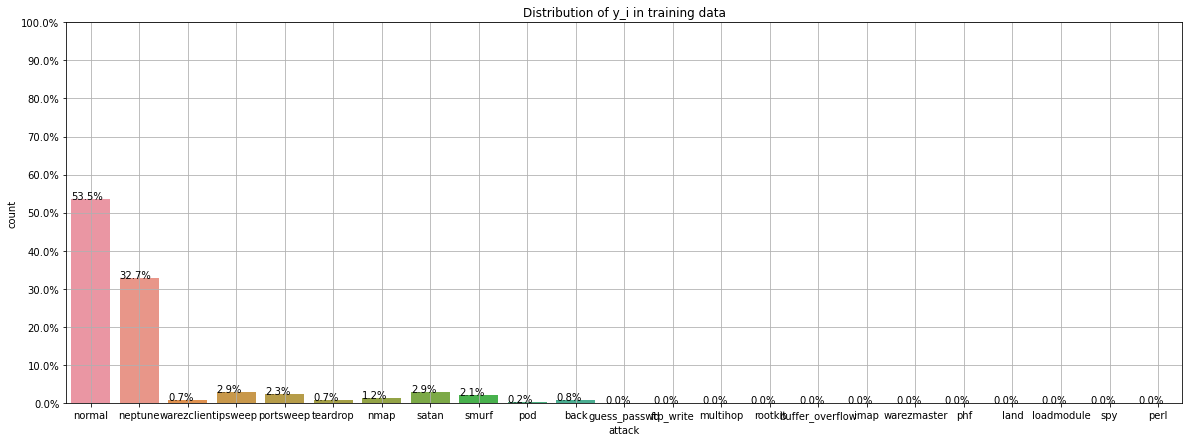

In [66]:
f, ax = plt.subplots(figsize=(20,7))
total = len(df) * 1

ax = sns.countplot(x="attack", data=df)

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
 
ax.yaxis.set_ticks(np.linspace(0, total, 11))

ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

plt.title("Distribution of y_i in training data")
plt.grid()
plt.show()

We are displaying the cells that succesfully logged_in with "1" and the ones that didn't with "0"
We can notice that 50000 managed to log in in comparison with around 7500 which didn't

In this part, we are classifing our data into 5 categories: normal, dos, probe, r2l, u2r.


In [67]:
# creating a function to give label
def labeling(x):
  if x == 'normal':
    return 0
  else:
    return 1

def labeling_attack_categories(x):
  dos = ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop', 'apache2', 'updstorm', 'processtable', 'worm']
  probe = ['satan', 'ipsweep', 'nmap', 'portsweep', 'mscan', 'saint']
  r2l = ['guess_password' 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'warezclient', 'spy', 'xlock', 'xsnoop', 'snmpguess', 'snmpgetattack', 'httptunnel', 'sendmail', 'named']
  u2r = ['buffer_overflow', 'loadmodule', 'rootkit', 'perl', 'sqlattack', 'xtem', 'ps']

  if x in dos:
    return 'dos'
  elif x in probe:
    return 'probe'
  elif x in r2l:
    return 'r2l'
  elif x in u2r:
    return 'u2r'
  else:
    return 'normal'
    
#stroing all the attack in the variable label    
label = df_preprocessed['attack'] 

# mapping all the attack to the desired output which is 0 and 1 
class_label = label.map(labeling_attack_categories)

#creating a new column called label in the training data
#df_preprocessed.drop('attack', axis=1, inplace=True)
df_preprocessed['attack'] = class_label



After creating and vizualizing the new column we will plot the distribution of class 1 and class 0 for having a better overview of our data

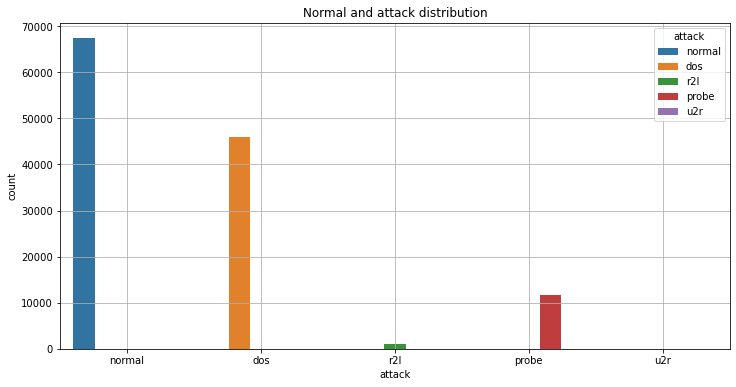

In [68]:
# distribution plot of class 1 and class 0
f, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='attack', data=df_preprocessed, hue='attack')
plt.title("Normal and attack distribution")
plt.grid()
plt.show()


## Train-Test Split


In [69]:
X = df_preprocessed.drop('attack', axis = 1)
y = df_preprocessed['attack']
#X = df.drop('attack', axis=1)
#y = df['attack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(100778, 117) (25195, 117)
(100778,) (25195,)


Helper function to evaluate every model in the same way

In [70]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
  start_time = time.time()
  model.predict(X_train) # Run predict on train data to measure time required for prediction

  time_predict = time.time()-start_time
  train_score = model.score(X_train, y_train)
  test_score = model.score(X_test, y_test)
  return time_predict, train_score, test_score

model_eval_data = dict()
conf_mat = dict()
from sklearn.metrics import confusion_matrix

# Model selection
We will visualy compare the model perforance so that we can decide on the model that is best suited to our purpose.
## Fitting the various models
We will fit each of the models to the data and save their confusion matrices and their performance for comparison later down the notebook.

**Code: Python implementation of Gaussian Naive Bayes**

Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes theorem. It is a simple classification technique, but has high functionality. They find use when the dimensionality of the inputs is high. Complex classification problems can also be implemented by using Naive Bayes Classifier.Naive Bayes makes the assumption that the features are independent. This means that we are still assuming class-specific covariance matrices , but the covariance matrices are diagonal matrices. This is due to the assumption that the features are independent. Gaussian Naive Bayes supports continuous valued features and models each as conforming to a Gaussian (normal) distribution.
An approach to create a simple model is to assume that the data is described by a Gaussian distribution with no co-variance (independent dimensions) between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all what is needed to define such a distribution.

In [71]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model_gnb = GaussianNB()
start_time = time.time()
model_gnb.fit(X_train, y_train.values.ravel())
time_train = time.time()-start_time

y_pred_test = model_gnb.predict(X_test)
conf_mat['gnb'] = confusion_matrix(y_test, y_pred_test)

time_predict, train_score, test_score = evaluate_model(model_gnb, X_train, y_train, X_test, y_test)

model_eval_data['gnb'] = {'time_train': time_train,
                          'time_predict': time_predict,
                          'train_score': train_score,
                          'test_score': test_score}


print(f"Training time: {model_eval_data['gnb']['time_train']:.2f}s")
print(f"Testing time: {model_eval_data['gnb']['time_predict']:.2f}s")
print(f"Train score {model_eval_data['gnb']['train_score']:.2f}")
print(f"Test score: {model_eval_data['gnb']['test_score']:.2f}")



Training time: 0.23s
Testing time: 0.16s
Train score 0.68
Test score: 0.68


**Code: Python implementation of Decision Tree**

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
In a decision tree, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. This algorithm compares the values of root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node.For the next node, the algorithm again compares the attribute value with the other sub-nodes and move further. It continues the process until it reaches the leaf node of the tree.


In [72]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
model_dt.fit(X_train, y_train.values.ravel())
time_train = time.time()-start_time

y_pred_test = model_dt.predict(X_test)
conf_mat['gb'] = confusion_matrix(y_test, y_pred_test)

time_predict, train_score, test_score = evaluate_model(model_dt, X_train, y_train, X_test, y_test)

model_eval_data['dt'] = {'time_train': time_train,
                          'time_predict': time_predict,
                          'train_score': train_score,
                          'test_score': test_score}

print(f"Training time: {model_eval_data['dt']['time_train']:.2f}s")
print(f"Testing time: {model_eval_data['dt']['time_predict']:.2f}s")
print(f"Train score {model_eval_data['dt']['train_score']:.2f}")
print(f"Test score: {model_eval_data['dt']['test_score']:.2f}")



Training time: 0.29s
Testing time: 0.01s
Train score 0.98
Test score: 0.98


**Code: Python Implementation of Random Forest Classifier**

Random Forest is a machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model. Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [73]:
from sklearn.ensemble import RandomForestClassifier
  
model_rf = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
model_rf.fit(X_train, y_train.values.ravel())
time_train = time.time()-start_time

y_pred_test = model_rf.predict(X_test)
conf_mat['rf'] = confusion_matrix(y_test, y_pred_test)

time_predict, train_score, test_score = evaluate_model(model_rf, X_train, y_train, X_test, y_test)

model_eval_data['rf'] = {'time_train': time_train,
                          'time_predict': time_predict,
                          'train_score': train_score,
                          'test_score': test_score}

print(f"Training time: {model_eval_data['rf']['time_train']:.2f}s")
print(f"Testing time: {model_eval_data['rf']['time_predict']:.2f}s")
print(f"Train score {model_eval_data['rf']['train_score']:.2f}")
print(f"Test score: {model_eval_data['rf']['test_score']:.2f}")

Training time: 1.25s
Testing time: 0.18s
Train score 1.00
Test score: 1.00


**Code: Python implementation of Support Vector Classifier**

Support Vector Machine or SVM is Supervised Learning algorithms, which is used for Classification as well as Regression problems.The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane. SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine

In [74]:
from sklearn.svm import SVC
  
model_svc = SVC(gamma = 'scale')
start_time = time.time()
model_svc.fit(X_train, y_train.values.ravel())
time_train = time.time()-start_time

y_pred_test = model_svc.predict(X_test)
conf_mat['svc']  = confusion_matrix(y_test, y_pred_test)

time_predict, train_score, test_score = evaluate_model(model_svc, X_train, y_train, X_test, y_test)

model_eval_data['svc'] = {'time_train': time_train,
                          'time_predict': time_predict,
                          'train_score': train_score,
                          'test_score': test_score}

print(f"Training time: {model_eval_data['svc']['time_train']:.2f}s")
print(f"Testing time: {model_eval_data['svc']['time_predict']:.2f}s")
print(f"Train score {model_eval_data['svc']['train_score']:.2f}")
print(f"Test score: {model_eval_data['svc']['test_score']:.2f}")

Training time: 18.94s
Testing time: 30.66s
Train score 1.00
Test score: 1.00


**Code: Python Implementation of Logistic Regression**

Logistic regression is one of the machine learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables. Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value.

In [ ]:
from sklearn.linear_model import LogisticRegression
  
model_lr = LogisticRegression(max_iter = 1200000)
start_time = time.time()
model_lr.fit(X_train, y_train.values.ravel())
time_train = time.time()-start_time

y_pred_test = model_lr.predict(X_test)
conf_mat['lr']  = confusion_matrix(y_test, y_pred_test)

time_predict, train_score, test_score = evaluate_model(model_lr, X_train, y_train, X_test, y_test)

model_eval_data['lr'] = {'time_train': time_train,
                          'time_predict': time_predict,
                          'train_score': train_score,
                          'test_score': test_score}

print(f"Training time: {model_eval_data['lr']['time_train']:.2f}s")
print(f"Testing time: {model_eval_data['lr']['time_predict']:.2f}s")
print(f"Train score {model_eval_data['lr']['train_score']:.2f}")
print(f"Test score: {model_eval_data['lr']['test_score']:.2f}")

**Code: Python Implementation of Gradient Boosting Classifier**

Gradient Boosting is an Ensemble Learning method ,in Gradient Boosting, each predictor tries to improve on its predecessor by reducing the errors. But the idea behind Gradient Boosting is that instead of fitting a predictor on the data at each iteration, it actually fits a new predictor to the residual errors made by the previous predictor. A gradient boosting classifier is used when the target column is binary.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
  
model_gb = GradientBoostingClassifier(random_state=0)
start_time = time.time()
model_gb.fit(X_train, y_train.values.ravel())
time_train = time.time()-start_time

y_pred_test = model_gb.predict(X_test)
conf_mat['gb']  = confusion_matrix(y_test, y_pred_test)

time_predict, train_score, test_score = evaluate_model(model_gb, X_train, y_train, X_test, y_test)

model_eval_data['gb'] = {'time_train': time_train,
                          'time_predict': time_predict,
                          'train_score': train_score,
                          'test_score': test_score}

print(f"Training time: {model_eval_data['gb']['time_train']:.2f}s")
print(f"Testing time: {model_eval_data['gb']['time_predict']:.2f}s")
print(f"Train score {model_eval_data['gb']['train_score']:.2f}")
print(f"Test score: {model_eval_data['gb']['test_score']:.2f}")


## Confusion Matrices
We plot the confusion matrices to visualize the performance of our clasifiers

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
for key in conf_mat:
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat[key])
  disp.plot()
  plt.title(key)
  plt.show()

From the confusion matrices we can see that the random forest classifier has roughly the same false positive and false negative chance, which is a bonus for the performance. We may want to tweak the false negative and positive probabilities, to make our classifier more or less agressive based on the cost of the different scenarios. For example, in case we the network we are trying to protect has sensitive information on it, we would like to make a clasifier that lowers the false negative probability as much as possible, even at the cost of a higher false positive probability, to protect our network as much as possible.

## Traning time/score plots
Now we can compare the performance of the different models we tested

In [ ]:
plt.figure(figsize=(5,5), dpi=100)
for key in model_eval_data:
  model = model_eval_data[key]
  plt.scatter(model['time_predict'], model['test_score'], label=key)
plt.grid()
plt.xlabel('Prediction time [s]')
plt.ylabel('Test score')
plt.legend()

plt.figure(figsize=(5,5), dpi=100)
for key in model_eval_data:
  model = model_eval_data[key]
  plt.scatter(model['time_train'], model['test_score'], label=key)
plt.grid()
plt.xlabel('Training time [s]')
plt.ylabel('Test score')
plt.legend()

Judging from the plots, the method rf the optimal choice for this dataset. It achieves the best test accuracy, while being quick to train and allowing for fast inference.

# Pipeline creation

Now that we have found our desired model together with the required preprocessing, we will create a Pipeline object, that will handle all the preprocessing for both the categorical and the numerical features and also the model itself. This pipeline allows us to fit the whole machine learning loop in a few lines of code and after, we can use the learned pipeline to make predictions on the Test.csv dataset.

In [ ]:
X = df.drop('attack', axis=1)
y = df['attack']
# mapping the attack columns to the attack type groups
class_label = y.map(labeling_attack_categories)
y = pd.DataFrame(class_label.ravel(), columns=['attack'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)


rf_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', model_rf)
])

rf_pipeline.fit(X_train, y_train)


train_score = rf_pipeline.score(X_train, y_train)
test_score = rf_pipeline.score(X_test, y_test)
print(train_score)
print(test_score)

If we then use the trained Random Forest pipeline to make predictions on our Test.csv dataset, we will receive the attack types directly. This is because we are encoding the attack types by their respective groups when we are fitting the pipeline to the training data.

In [ ]:
#rf_pipeline.predict(df_test)
df_to_save = pd.concat([df_test, rf_pipeline.predict(df_test)])
df_to_save.save('Train_output.csv', format='csv')